<img src="images/IsotipoDIisocolor.png" style="float:left;height:80px">
<img src="images/escudo_utfsm.gif" style="float:right;height:80px">
<center>
    <h2> INF391 - Reconocimiento de Patrones en Minería de Datos </h2>
    <h2> <i>Predicción de contagios y muertes por COVID-19 en Chile</i> </h2>
</center>

|        **Nombre**        | **Rol USM** |
|--------------------------|-------------|
| Javier Moreno Gormaz     | 201673038-9 |
| Matías Valenzuela Ibarra | 201573014-8 |

---

### Paquetes utilizados

In [1]:
# Paquetes para manejar los datasets
import pandas as pd

# Paquetes numérico para procesar los datos
import scipy as scp
import numpy as np
from numpy import log

# Paquete para implementar widget
from ipywidgets import interact

# Paquete para realizar gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline
sns.set_style("dark")

### Carga de datos

A continuación se realiza la carga de los datos obtenidos desde la página del Ministerio de Ciencia, Tecnología, Conocimiento e Innovación, que son los reportados por el Ministerio de Salud en sus reportes diarios:

In [2]:
dataIncidencia = pd.read_csv(r'Datos-COVID19\TasaIncidencia\TasaDeIncidencia_std.csv')
dataTotalesIncremental = pd.read_csv(r'Datos-COVID19\TotalesIncremental\Covid-19_std.csv')
dataCasosNuevosRegion = pd.read_csv(r'Datos-COVID19\CNR\FechaInicioSintomas_reportadosSEREMIHistorico_std.csv')
dataFallecidosRegion = pd.read_csv(r'Datos-COVID19\FRInc\FallecidosCumulativo_std.csv')
dataTotalRegionIncremental = pd.read_csv(r'Datos-COVID19\TRInc\CasosNuevosCumulativo_std.csv')

#### Casos nuevos por Región incremental

In [3]:
regionIncremental = dataTotalRegionIncremental.pivot_table(index='Region', values='Total', columns='Fecha')
regionIncremental

Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,129.0,140.0,154.0,85.0,162.0,132.0,128.0,161.0,134.0
Araucanía,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,28.0,42.0,44.0,27.0,19.0,57.0,30.0,21.0,32.0
Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,106.0,75.0,59.0,78.0,64.0,98.0,86.0,77.0,150.0
Atacama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,117.0,95.0,99.0,133.0,34.0,167.0,60.0,129.0,138.0,13.0
Aysén,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,8.0
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,177.0,174.0,182.0,145.0,121.0,152.0,179.0,227.0,175.0,211.0
Coquimbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173.0,88.0,128.0,82.0,108.0,81.0,129.0,114.0,95.0,146.0
Los Lagos,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,122.0,142.0,132.0,62.0,123.0,92.0,96.0,137.0,114.0,128.0
Los Ríos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,6.0,8.0,4.0,5.0,5.0,4.0,14.0,4.0


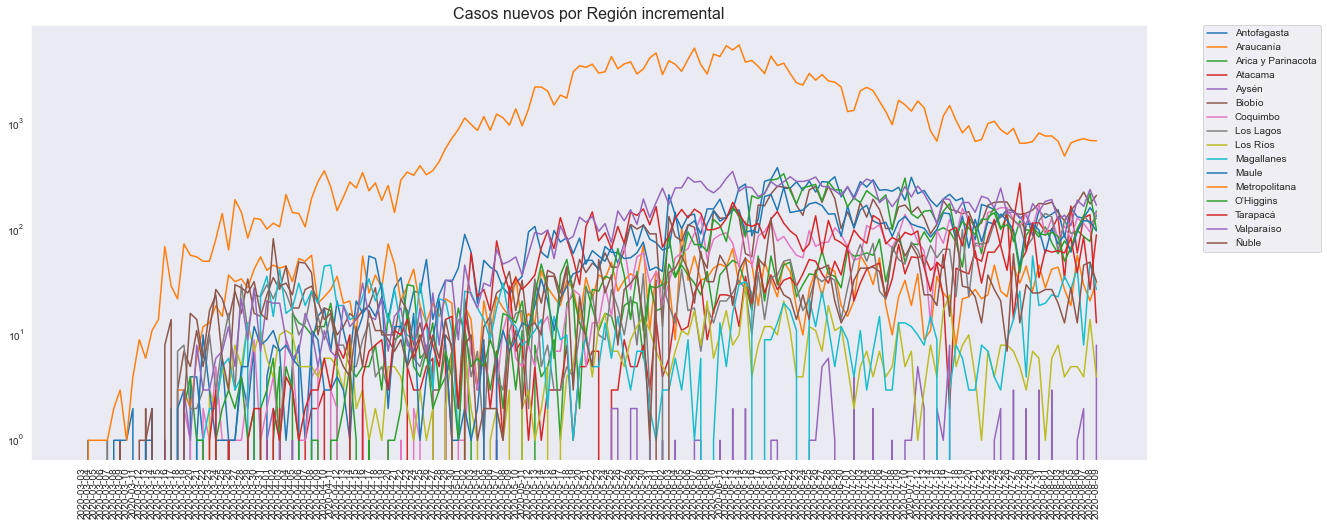

In [19]:
regiones = np.delete(regionIncremental.index.values,14)
plt.figure(figsize=(20,8))
for region in regiones:
    plt.plot(regionIncremental.loc[region])
plt.title('Casos nuevos por Región incremental (log)', fontsize=16)
plt.legend(regiones, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

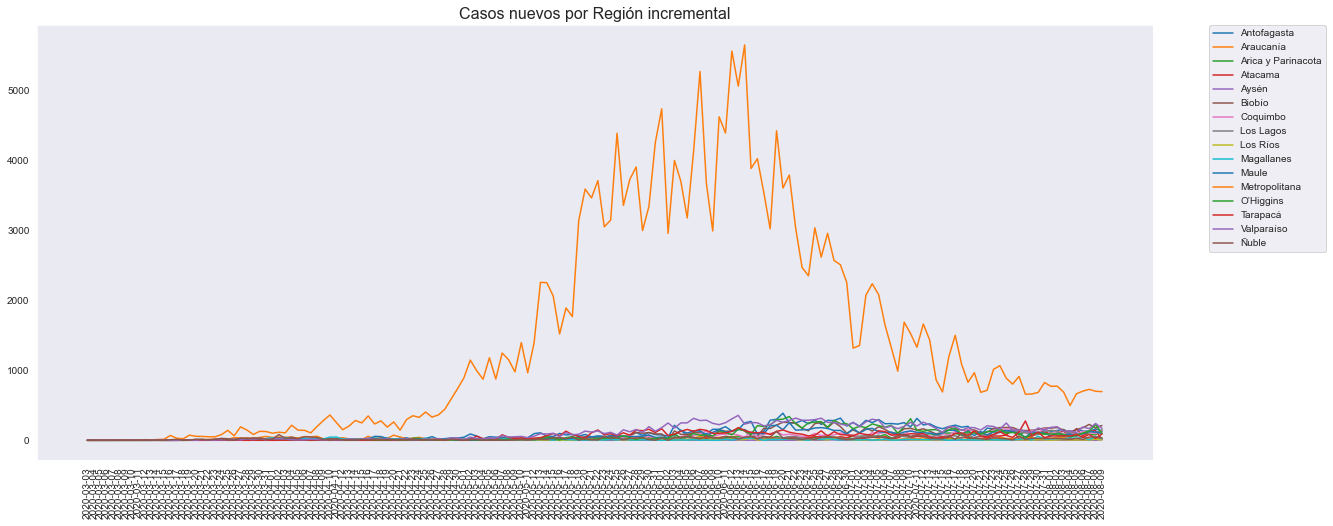

In [20]:
regiones = np.delete(regionIncremental.index.values,14)
plt.figure(figsize=(20,8))
for region in regiones:
    plt.plot(regionIncremental.loc[region])
plt.title('Casos nuevos por Región incremental', fontsize=16)
plt.legend(regiones, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

El análisis estadístico descriptivo para los casos nuevos para cada región se presenta en la siguiente tabla:

In [5]:
est = list()
for i in range(17):
    est.append(regionIncremental.iloc[i].describe()[1:])
est = pd.DataFrame(est).drop('Total')
est

,mean,std,min,25%,50%,75%,max
Antofagasta,97.33125,95.423236,0.0,13.25,67.5,157.00,387.0
Araucanía,27.43750,17.669107,0.0,15.00,26.0,40.00,106.0
Arica y Parinacota,32.05000,36.616799,0.0,3.00,17.0,52.25,150.0
Atacama,22.04375,32.839297,0.0,0.00,6.5,34.25,167.0
Aysén,0.58750,1.319365,0.0,0.00,0.0,1.00,8.0
Biobío,78.16250,74.597949,0.0,14.00,43.5,144.25,259.0
Coquimbo,44.06250,49.139986,0.0,1.00,16.5,81.25,173.0
Los Lagos,30.25625,35.707802,0.0,5.00,16.5,37.25,142.0
Los Ríos,5.88750,5.381061,0.0,2.00,5.0,8.00,32.0
Magallanes,12.14375,11.536023,0.0,3.00,9.0,18.00,56.0


#### Fallecidos por región

In [6]:
dataFallecidosRegion.pivot_table(index='Region', values='Total', columns='Fecha')

Fecha,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,...,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,347.0,352.0,353.0,358.0,358.0,361.0,367.0,372.0,376.0,378.0
Araucanía,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,...,78.0,78.0,79.0,79.0,79.0,79.0,81.0,82.0,83.0,83.0
Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,60.0,63.0,68.0,68.0,68.0,73.0,74.0,76.0,77.0
Atacama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,13.0,13.0,14.0,14.0,16.0,19.0,19.0,19.0
Aysén,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Biobío,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,119.0,120.0,120.0,124.0,125.0,127.0,131.0,132.0,135.0,139.0
Coquimbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,74.0,74.0,75.0,75.0,76.0,80.0,81.0,83.0,84.0
Los Lagos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,41.0,42.0,42.0,43.0,43.0,49.0,51.0,52.0,54.0
Los Ríos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,15.0,15.0,15.0


### Predicción casos nuevos próximos 30 días por región

A continuación se encuentra el modelo LSTM entrenado para este proyecto. Se intentó implementar el modelo GRU, pero generaba fallas en los computadores de los integrantes del equipo, por lo que no se continuó con su desarrollo.

In [7]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 

totalRegion = dataTotalRegionIncremental
data = totalRegion.pivot_table(values='Total', index='Region' , columns='Fecha')
predicciones=np.empty([3,17,10])
for i in range(3):
    j=0
    for label,raw_seq in data.iterrows():
        # define input sequence
        # choose a number of time steps
        n_steps_in, n_steps_out = 15, 10
        # split into samples
        X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
        model.add(LSTM(100, activation='relu'))
        model.add(Dense(n_steps_out))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=50, verbose=0)
        # demonstrate prediction
        x_input = array(raw_seq.tolist()[-15:])
        x_input = x_input.reshape((1, n_steps_in, n_features))
        yhat = model.predict(x_input, verbose=0)
        predicciones[i][j]=yhat
        j+=1

Using TensorFlow backend.


In [8]:
totalRegionJulio=totalRegion[totalRegion['Fecha'] < '2020-07-02']

En la siguiente celda se realiza la predicción de los valores de nuevos contagios para el mes de julio:

In [9]:
prediccionesJulio=np.empty([3,17,10])
for i in range(3):
    j=0
    for label,raw_seq in data.iterrows():
        # define input sequence
        # choose a number of time steps
        n_steps_in, n_steps_out = 15, 10
        # split into samples
        X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
        model.add(LSTM(100, activation='relu'))
        model.add(Dense(n_steps_out))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=50, verbose=0)
        # demonstrate prediction
        x_input = array(raw_seq.tolist()[-15:])
        x_input = x_input.reshape((1, n_steps_in, n_features))
        yhat = model.predict(x_input, verbose=0)
        prediccionesJulio[i][j]=yhat
        j+=1

In [11]:
predicciones_mean_agosto=np.empty([17,10])
for i in range(17):
    for j in range(10):
        predicciones_mean_agosto[i][j]=(predicciones[0][i][j]+predicciones[1][i][j]+predicciones[2][i][j])/3
fechas_prediccion=['2020-08-12','2020-08-15','2020-08-18','2020-08-21','2020-08-24','2020-08-27','2020-08-30','2020-09-02','2020-09-05','2020-09-08']
casos_nuevos=pd.DataFrame(predicciones_mean_agosto, index=data.index, columns=fechas_prediccion)
prediccion_casos_nuevos_agosto= pd.concat([data, casos_nuevos], axis=1, sort=False)
prediccion_casos_nuevos_agosto

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-08-12,2020-08-15,2020-08-18,2020-08-21,2020-08-24,2020-08-27,2020-08-30,2020-09-02,2020-09-05,2020-09-08
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173.594223,180.008799,164.107976,183.161499,138.053876,166.698191,190.275487,172.157962,160.166209,164.129349
Araucanía,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.285374,29.154090,30.032246,29.900439,29.646814,26.738086,27.272141,27.903903,32.881938,30.319764
Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.236305,91.017614,96.087298,77.096954,84.128765,82.102061,84.713804,73.851070,80.211764,81.465808
Atacama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119.331418,107.315519,91.970151,143.773107,78.793798,114.978940,121.627073,135.039363,157.165273,112.209290
Aysén,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.045745,1.114966,1.010320,1.265684,1.158231,0.996204,1.057871,1.121716,1.098073,1.529773
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,154.235316,150.692810,144.188161,167.118281,148.793452,160.918859,152.957021,140.660894,134.215174,144.847570
Coquimbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.006851,118.277903,111.264600,117.775757,111.515849,106.611694,117.990865,135.200933,125.428736,122.337898
Los Lagos,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,198.235428,208.099091,236.732691,188.991694,196.013580,188.938970,202.429031,247.435262,217.721212,235.395086
Los Ríos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.962840,5.874334,4.573534,4.902176,4.710713,4.393081,4.004667,3.344488,3.539754,3.838491


In [12]:
predicciones_mean_julio=np.empty([17,10])
for i in range(17):
    for j in range(10):
        predicciones_mean_julio[i][j]=(prediccionesJulio[0][i][j]+prediccionesJulio[1][i][j]+prediccionesJulio[2][i][j])/3
fechas_prediccion=['2020-07-04','2020-07-07','2020-07-10','2020-07-13','2020-07-16','2020-07-19','2020-07-22','2020-07-25','2020-07-28','2020-07-31']
casos_nuevos_julio=pd.DataFrame(predicciones_mean_julio, index=data.index, columns=fechas_prediccion)
prediccion_casos_nuevos_julio= pd.concat([data, casos_nuevos], axis=1, sort=False)
prediccion_casos_nuevos_julio

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-08-12,2020-08-15,2020-08-18,2020-08-21,2020-08-24,2020-08-27,2020-08-30,2020-09-02,2020-09-05,2020-09-08
Region,,,,,,,,,,,,,,,,,,,,,
Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173.594223,180.008799,164.107976,183.161499,138.053876,166.698191,190.275487,172.157962,160.166209,164.129349
Araucanía,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.285374,29.154090,30.032246,29.900439,29.646814,26.738086,27.272141,27.903903,32.881938,30.319764
Arica y Parinacota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.236305,91.017614,96.087298,77.096954,84.128765,82.102061,84.713804,73.851070,80.211764,81.465808
Atacama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,119.331418,107.315519,91.970151,143.773107,78.793798,114.978940,121.627073,135.039363,157.165273,112.209290
Aysén,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.045745,1.114966,1.010320,1.265684,1.158231,0.996204,1.057871,1.121716,1.098073,1.529773
Biobío,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,154.235316,150.692810,144.188161,167.118281,148.793452,160.918859,152.957021,140.660894,134.215174,144.847570
Coquimbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.006851,118.277903,111.264600,117.775757,111.515849,106.611694,117.990865,135.200933,125.428736,122.337898
Los Lagos,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,198.235428,208.099091,236.732691,188.991694,196.013580,188.938970,202.429031,247.435262,217.721212,235.395086
Los Ríos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.962840,5.874334,4.573534,4.902176,4.710713,4.393081,4.004667,3.344488,3.539754,3.838491


#### Grafica de predicciones

A continuación se grafican las predicciones obtenidas para el mes de julio. Se utiliza escala logarítmica en el eje y debido a que la cantidad de casos en la Región Metropolitana es muy grande en comparación al resto de las regiones del país, por lo que un gráfico en escala decimal dificulta la visualización de los resultados:

In [13]:
new_df = casos_nuevos_julio.unstack().reset_index()
new_df.columns = ['Fecha', 'Region', 'Total']
new_df = new_df[['Fecha', 'Total', 'Region']]
new_df = new_df[new_df['Region']!='Total']

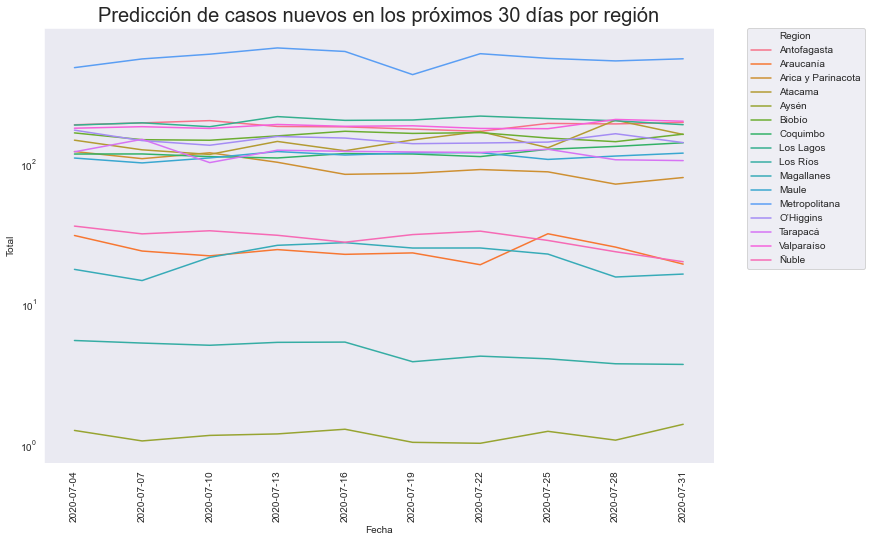

In [14]:
plt.figure(figsize=(12,8))
pred=sns.lineplot(data=new_df, x='Fecha', y='Total', hue='Region')
pred.set_title("Predicción de casos nuevos en los próximos 30 días por región",loc='center', fontsize=20)
pred.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

In [15]:
fechas = ['2020-07-{}'.format(str(4+i*3) if 4+i*3 >= 10 else '0'+str(4+i*3)) for i in range(10)]
real_data = dataTotalRegionIncremental[dataTotalRegionIncremental['Fecha'].isin(fechas)]
real_data.pivot_table(index='Region', values='Total', columns='Fecha')

Fecha,2020-07-04,2020-07-07,2020-07-10,2020-07-13,2020-07-16,2020-07-19,2020-07-22,2020-07-25,2020-07-28,2020-07-31
Region,,,,,,,,,,
Antofagasta,253.0,239.0,190.0,235.0,195.0,199.0,173.0,131.0,128.0,151.0
Araucanía,45.0,19.0,33.0,9.0,25.0,22.0,22.0,26.0,31.0,46.0
Arica y Parinacota,60.0,32.0,49.0,95.0,104.0,44.0,59.0,100.0,121.0,85.0
Atacama,42.0,22.0,38.0,57.0,23.0,40.0,31.0,74.0,48.0,117.0
Aysén,0.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,3.0
Biobío,131.0,102.0,171.0,130.0,188.0,141.0,116.0,183.0,139.0,177.0
Coquimbo,109.0,76.0,139.0,63.0,74.0,158.0,68.0,161.0,105.0,173.0
Los Lagos,50.0,22.0,47.0,45.0,65.0,100.0,73.0,131.0,111.0,122.0
Los Ríos,7.0,4.0,5.0,3.0,17.0,8.0,1.0,8.0,5.0,6.0


Se generan los gráficos para comparar los valores predichos y los reales de contagios por región. Éstos se exportan en formato PNG y se guardan en la carpeta ```plots```:

In [16]:
real_data = real_data[real_data['Region']!='Total']
real_data.reset_index(drop=True, inplace=True)
lista = list(real_data['Region'].unique())
for r in lista:
    r_df = real_data[real_data['Region'] == r]
    p_df = new_df[new_df['Region']==r]
    plt.figure(figsize=(12,8))
    pred=sns.lineplot(data=p_df, x='Fecha', y='Total', hue='Region', palette=['blue'])
    real=sns.lineplot(data=r_df, x='Fecha', y='Total', hue='Region', markers=True, palette=['red'])
    pred.set_title("Predicción de casos nuevos en los próximos 30 días - "+r,loc='center', fontsize=18)
    pred.get_legend().remove()
    plt.xticks(rotation=90)
    plt.savefig('plots/'+r+'.png')
    plt.close()

A continuación se presenta un *widget* para visualizar los gráficos que comparan los valores reales con los valores predichos por el modelo, separados por cada región del país. La curva de color <font color='red'>rojo</font> corresponde a la cantidad real de contagios en la respectiva región, mientras que la curva de color <font color='blue'>azul</font> es la cantidad predicha por nuestro modelo.

In [17]:
def show_images(region):
    display(Image(filename='plots/'+region+'.png', width=600))
interact(show_images, region=lista)

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…

<function __main__.show_images(region)>

### Error

A continuación se calcula el error absoluto promedio por cada región del país, y de todas las regiones en total:

In [49]:
error = dict()
mean = list()
print("--- Error absoluto promedio ---")
for r in lista:
    v_r = real_data[real_data['Region'] == r]['Total'].values
    v_p = new_df[new_df['Region']==r]['Total'].values
    err = np.absolute(v_r - v_p)
    error[r] = err
    mean.append(np.mean(err))
    print("> "+r+":", np.mean(err))
print("> País:", np.mean(np.array(mean)))

--- Error absoluto promedio ---
> Arica y Parinacota: 38.05666135152181
> Tarapacá: 72.06623509724935
> Antofagasta: 37.740203857421875
> Atacama: 99.37309366861977
> Coquimbo: 34.888873545328785
> Valparaíso: 48.17220458984375
> Metropolitana: 592.5734334309897
> O’Higgins: 56.47103652954102
> Maule: 32.389426676432294
> Ñuble: 12.194316228230793
> Biobío: 27.76898854573568
> Araucanía: 8.931689802805582
> Los Ríos: 3.1535921971003216
> Los Lagos: 126.6448181152344
> Aysén: 0.9160423715909323
> Magallanes: 15.167093880971274
> País: 75.40673186803858
